### Titanic Data Science Solutions

#### 이 노트북은 [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312)라는  책과 관련이 있습니다.

이 노트북은 Kaggle과 같은 데이터 관련 문제를 해결하기 위한 일반적인 워크플로우를 안내한다. 데이터 분석 관련 공부를 위한 몇 가지 훌륭한 노트북이 있다. 그러나 대부분은 전문가들을 위한 전문가들에 의해 만들어졌기 때문에 대다수의 설명이 생략되어 있다. 이 노트북의 목표는 과정 중 모든 결정에 대해 각 단계와 근거를 설명하는 단계별 워크플로우가 되는 것이다.

### Workflow stages

워크플로우는 책에 설명 되어 있듯이 7단계로 진행 된다.

1. 질문 또는 문제 정의
2. train, test data 확보
3. Data 준비 및 정리
4. 패턴 분석 및 데이터 탐색
5. 모델링 및 예측
6. 최종 솔루션 시각화, 보고 및 제시
7. 결과 제출

워크플로우는 각 단계가 다른 단계를 따를 수 있는 일반적인 순서를 나타낸다. 그러나 예외를 가진 경우도 존재한다.

- 여러 워크플로우 단계 결합 가능, 데이터를 시각화하여 분석할 수 있다.
- 단계별 먼저 나오는 경우도 있다. 데이터 전처리 전에도 분석 가능하다.
- 워크플로우에서 스테이지를 여러 번 수행 가능. 시각화 단계를 여러 번 사용할 수 있다.
- 결과를 제출할 필요가 없을 경우에는 마지막 단계를 빼도 된다.

### 질문 및 문제 정의

Kaggle과 같은 사이트는 데이터셋을 제공하는 동시에 해결해야 할 문자나 질문할 문제를 정의해준다. 이 대회의 질문이나 문제 정의는 [여기](https://www.kaggle.com/c/titanic)에 설명되어 있다.

> 타이타닉에서 생존했거나 생존하지 못한 승객의 training set을 통해 test dataset의 승객의 생존 여부를 파악해야 한다.

우리는 우리 문제의 domain에 대한 초기 이해를 발전시키고 싶을 수 있다. [여기](https://www.kaggle.com/c/titanic)에 설명되어 있다. 다음은 주목할 만한 사항이다.

- 1912년 4월 15일, 처녀 항해 중 타이타닉호는 빙산과 충돌한 후 침몰하여 승객과 승무원 2224명 중 1502명이 사망, 생존율은 32%이다.
- 난파선이 이처럼 인명피해를 낸 이유 중 하나는 승객과 승무원을 위한 구명보트가 부족했기 때문이다.
- 비록 침몰에서 살아남는 데는 운의 요소도 있었지만, 여성, 어린이, 상류층 등 다른 사람들보다 더 많이 살아남은 군집들이 존재했다.

### Workflow goals

Data science solution workflow는 7가지 주요 목표를 해결해야된다.

#### 1) Classifying
우리는 우리의 샘플을 분류하거나 분류하기를 원할 수 있다. 또한 다양한 클래스와 솔루션 목표의 상관 관계 또는 시사점을 이해하고 싶어할 수 있다.

#### 2) Correlating
Train data에서 사용 가능한 feature를 기준으로 문제에 접근할 수 있다. 어떤 feature가 우리의 solution 목표에 크게 기여할까? 통계적으로 feature와 solution 목표 사이에 상관관계가 있는지? feature 값이 변경 되면 solution 상태도 변경되고 반대의 경우도 변경이 되는지? 주어진 데이터셋의 연속형, 범주형 feature에 모두 테스트 할 수 있다. 또한 생존 이외의 후속 목표 또는 workflow stage에 대한 feature간 상관관계 확인 가능하다. 특정 feature를 상호 연결하면 feature를 생성, 완료, 수정하는데 도움이 될 수 있다.

#### 3) Converting
모델링 단계에서는 데이터를 준비해야 된다. 모델 선택에 따라 모든 feature를 수치형으로 변환해야 할 수도 있다. 예를 들어 텍스트 범주형 값을 수치형으로 변환한다.

#### 4) Completing
데이터 준비를 위해 feature 내에 결측값을 추정해야 할 수도 있다. 결측값이 없을 때 모델이 가장 잘 작동한다.

#### 5) Correcting
주어진 데이터셋에서 feature 내에 오류 또는 부정확한 값이 있는지 분석하고 이러한 값이 나타나거나 오류가 포함된 샘플을 제외할 수도 있다. 이를 위한 방법으로 샘플 또는 feature 중 outliers를 탐지하는 것이다. 분석에 도움이 되지 않거나 결과가 크게 왜곡될 수 있는 경우 feature를 완전히 버릴 수도 있다.

#### 6) Creating
기존 feature 또는 feature 세트의 기반으로 새로운 feature를 만들 수 있다. 예를 들어 새 feature는 상관관계, 변환, 완전성 목표를 따른다.

#### 7) Charting
데이터의 feature 및 솔루션 목표에 따라 올바른 시각화 그림 및 차트를 선택하는 방법이다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Data 획득
Pandas 패키지는 데이터셋을 사용하는데 도움이 된다. 먼저 Pandas DataFrame으로 train, test data를 불러오고 또한 두 dataset을 결합하여 함께 특정 작업을 실행한다.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Analyze by describing data
Pandas는 프로젝트 초기에 이어지는 질문에 대한 데이터셋을 설명하는 데 도움이 된다.

#### 데이터셋에서 사용 가능한 feature는 무엇일까?

이러한 feature를 조작하거나 분석하기 위해 이름을 기록한다. 이러한 feature 이름은 Kaggle data page에 설명되어 있다.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### 표본에서 나온 수치형 데이터의 분포는?

이것은 실제 문제 영역의 trainset이 얼마나 대표적인지 파악할 수 있다.

- 주어진 데이터의 수는 타이타닉호에 탑승한 실제 승객 수(2,224명)의 40%인 891명이다.
- Survived는 값이 0, 1인 범주형 feature이다.
- 약 38%의 샘플이 32%의 실제 생존율을 나타냈다.
- 대부분의 승객(75% 이상)은 부모나 자녀와 함께 여행하지 않았다.
- 거의 30%의 승객들이 형제, 자매나 배우자와 함께 타고 있었다.
- 요금은 최재 512달러까지 지불하는 소수의 승객으로 상당히 다양하다.
- 65~80세의 노인 승객은 거의 없다.

In [6]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 데이터의 분포는?

- dataset에서 이름은 고유값이다.
- Sex 변수는 두 개의 가능한 값으로 65%는 남성이다.
- Cabin값은 여러 표본이 중복되어 있다. 또는 여러 명의 승객이 한 객실을 함께 사용했다.
- Embarked는 3가지 값이 가능하다. 대부분 승객은 S port이다.
- Ticket feature은 중복 값 비율이 22%로 높다.

In [7]:
# 범주형 자료에 대한 요약
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kimball, Mr. Edwin Nelson Jr",male,1601,G6,S
freq,1,577,7,4,644


### 데이터 분석에 기반한 가정

우리는 지금까지 수행한 데이터 분석을 바탕으로 다음과 같은 가정에 도달했다. 적절한 조치를 취하기 전에 이러한 가정을 더 검증할 수 있다.

- **상관 관계(Correlating)**

각 기능이 Survival과 얼마나 잘 연관이 있는지 알고 싶다. 초기에 이 작업을 수행하고 후반의 모델링된 상관 관계와 일치시키고자 한다.

- **Completing**


1. Survival과 밀접한 관련이 있는 Age feature를 completing하길 원할 수 있다.
2. Embarked feature을 다른 feature과 연관시킬 수 있으므로 completing하길 원할 수 있다.


- **수정(Correcting)**


1. 중복 비율(22%)이 높고 티켓과 생존 사이에는 상관 관계가 없을 수 있으므로 티켓 feature은 분석에서 제외될 수 있다.
2. Cabin feature은 불완전하거나 train, test set에서 null 값을 많이 포함하므로 삭제될 수 있다.
3. PassengerId는 생존에 기여하지 않으므로 교육 데이터 세트에서 삭제될 수 있다.
4. Name feature은 상대적으로 표준이 아니므로 생존에 직접 기여하지 않을 수 있으므로 삭제될 수 있다.


- **Creating**


1. 우리는 Parch와 SibSp를 기반으로 Family라는 새로운 feature을 만들어 탑승한 가족 구성원의 총 수를 얻기를 원할지도 모른다.
2. Name feature에서 Title만 추출할 수도 있다.
3. Age 밴드에 관한 새로운 feature를 원할 수 있다. 이렇게 하면 연속적인 수치형 데이터가 순서형 범주형으로 바뀐다.
4. Fare range를 만들고 싶을 수도 있다.


- **Classifying**

또한 앞에서 언급한 문제 설명에 따라 가정을 추가할 수도 있다.

1. 여성은 생존했을 가능성이 더 높다.
2. 아이들은 생존했을 가능성이 더 높다.
3. 상류층 승객(Pclass=1)은 생존했을 가능성이 더 높다.

### Pivot feature를 사용해 분석

일부 관측치와 가정을 확인하기 위해서 pivoting feature로 feature간 상관 관계를 신속하게 분석할 수 있다. 이 단계에서는 빈 값이 없는 feature에 대해서만 그렇게 할 수 있다. 범주형(Sex), 순서형(Pclass) 또는 이산형(SibsP, Parch)인 feature에만 하는 것이 합리적이다.

In [8]:
train_df[['Pclass','Survived']]\
.groupby(['Pclass'], as_index=False)\
.mean()\
.sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex','Survived']]\
.groupby(['Sex'], as_index = False)\
.mean()\
.sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]]\
.groupby(['SibSp'], as_index=False)\
.mean()\
.sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 시각화를 통한 데이터 분석

이제 시각화를 확인해 몇 가지 가정을 확인할 수 있다.

#### - 수치데이터의 상관 관계

먼저 수치형 데이터와 솔루션 목표인 Survived 간의 상관 관계를 파악해본다.

히스토그램 차트는 밴딩 또는 범위가 유용한 패턴을 식별하는 데 도움이 되는 'Age'와 같은 연속적인 수치형 데이터를 분석하는데 유용하다. 또한 자동으로 범위가 정의돼 표본의 분포를 나타낼 수 있다. 

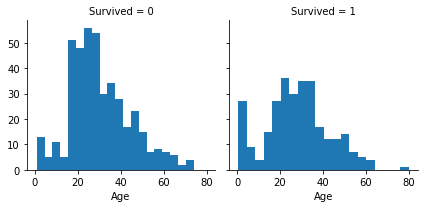

In [12]:
# Survived 도화지 생성
g = sns.FacetGrid(train_df, col='Survived')
# 값 입력
g.map(plt.hist, 'Age', bins = 20)

x축은 승객 수를 나타낸다.

- **관찰 결과**


1. 유아(4살 이하)는 생존율이 높다.
2. 최고령 승객(80세)는 생존했다.
3. 15-25세 사이의 많은 사람들은 생존하지 못했다.
4. 대부분의 승객들은 15-35세 사이이다.

이 간단한 분석을 통해 이후 워크플로우 단계에 대한 결정으로 가정을 확인할 수 있다.

- **결정**


1. 모델을 훈련할때 'Age'라는 feature는 고려해야 한다.
2. 'Age'의 null value를 처리해야 한다.
3. 'Age'를 그룹화해야 한다.

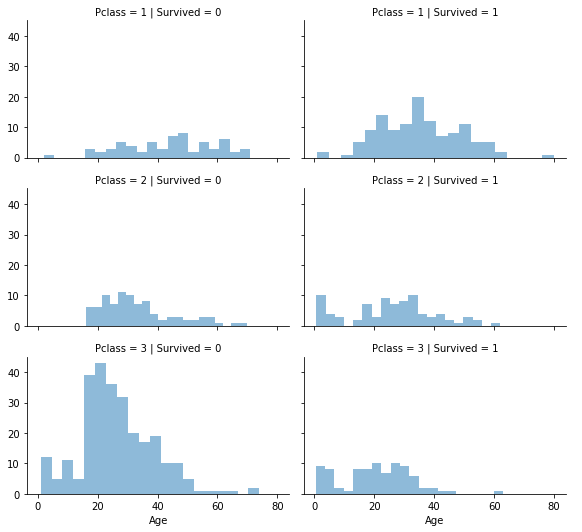

In [13]:
# 도화지 생성
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass',
                    size = 2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20).add_legend()

- **관찰 결과**


1. Pclass=3에는 대부분의 승객이 있었지만, 대부분은 살아남지 못했다.
2. Pclass=2와 Pclass=3의 유아 승객은 대부분 생존했다.
3. Pclass=1의 대부분의 승객은 살아남았다.
4. Pclass는 승객 연령 분포에 따라 다르다.


- **결정**


1. 모델을 훈련할때 'Pclass'라는 feature는 고려해야 한다.

#### - 범주형 데이터의 상관 관계

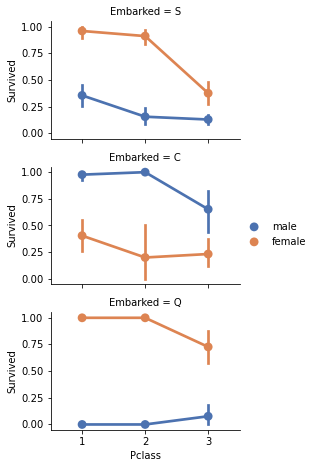

In [14]:
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep').add_legend()

- **관찰 결과**


1. 여성 승객들은 남성들보다 생존율이 훨씬 더 높다.
2. Embarked = C인 경우는 예외로 남성이 생존율이 높다.


- **결정**


1. 모델을 훈련할때 'Sex'라는 feature는 고려해야 한다.
2. Completing후 'Embarked' feature를 추가해야 된다.

#### - 범주형 feature와 수치형 feature의 상관 관계

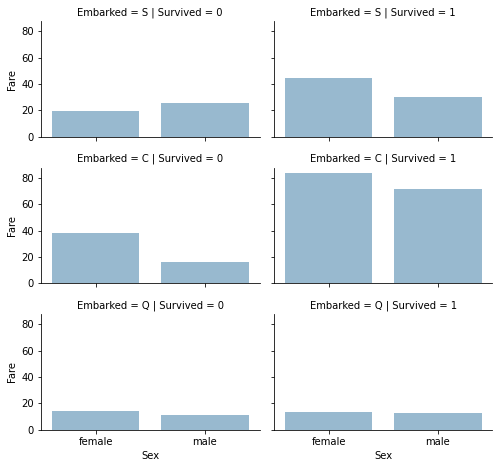

In [15]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci = None)#.add_legend()

- **관찰 결과**


1. 높은 요금을 지불하는 승객들이 더 나은 생존을 했다.
2. Embarked는 생존율과 관련이 있다.


- **결정**


1. 'Fare'를 밴딩하여 고려해봐야한다.

### Wrangle data

우리는 dataset 및 솔루션 요구사항에 관한 몇가지 가정과 결정을 수집했다. 이제 목표를 위한 여러 가정과 결정을 위해 데이터를 처리해야된다.

- **feature 삭제**

feature를 삭제함으로써 데이터를 줄일 수 있다. notebook 속도를 높이고 분석을 용이하게 한다. 가정과 결정에 따라 Cabin, Ticket feature를 삭제한다.

train, test 데이터에 모두 작업을 수행해 일관성을 유지해야 한다.

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 기존 feature에서 새로운 feature 생성

Name과 PassengerId을 삭제하기 전에 Name에서 Title만 추출해 생존 간의 상관 관계를 분석하려고 한다. 다음 코드에서는 정규식을 사용해 성을 추출한다.

In [17]:
for dataset in combine:
    # . 앞에 있는 문자 추출
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
# count
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


다양한 Title을 일반적인 이름 또는 희귀한 이름으로 변경할 수 있다.

In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt',
                                                 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


범주형 데이터를 이산형 데이터로 바꿀 수 있다.

In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    # dataset['Title'].apply(lambda x : title_mapping[x])
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3


이제 Name feature은 train, test에서 삭제할 수 있다. 또한 PassenantId도 필요하지 않아 삭제한다.

In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 범주형 feature를 변환

이제 문자열이 포함된 feature를 수치형으로 변환한다. 이는 모델링 하기 위한 조건입니다.

먼저 Sex feature를 0,1로 나타낼 수 있게 변환한다.

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3


다음으로는 Age feature이다.

먼저 누락되어 있거나 Null값이 있는 feature를 추청하고 채우는 것부터 해야 한다. 수치형 데이터를 채우기 위해 세 가지 방법을 고려할 수 있다.

1. 간단한 방법은 평균과 표준 편차 사이에 난수를 생성하는 것이다.
2. 추정하는 것보다 정확한 방법은 상관 관계가 있는 다른 feature를 사용하는 것이다. Pclass, Sex feature 조합을 통해 그룹별 중앙값을 사용해 Age를 추측한다.
3. 1,2의 방법을 결합한다. 중앙값 대신에 평균과 표준 편차 사이의 난수를 이용해 그룹별로 대체한다.

방법 1,3은 모델에 무작위 값을 넣는 방법이다. 여러 실행에 따라 결과값이 달라질 수 있다. 따라서 방법 2를 선택할 것이다.

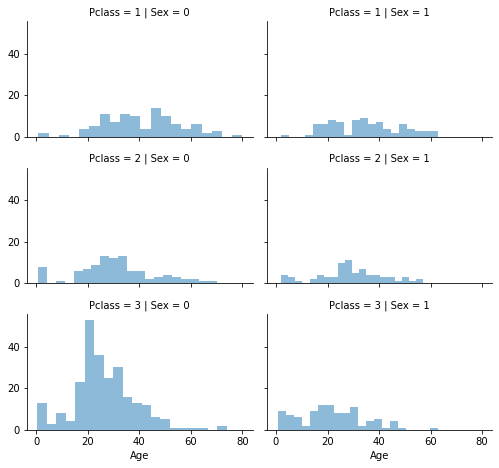

In [22]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins = 20)

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            # null값 제거한 dataframe을 guess_df에 저장
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # 중앙값 산출
            age_guess = guess_df.median()
            
            # 0.5 단위로 변경
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    # int형으로 변경
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3


In [25]:
# Age 밴드 생성 후 생존율 확인
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [27]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [28]:
# FamilySize 생성
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False)\
.mean().sort_values(by = 'Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
# 사용하지 않는 feature drop
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Pclass와 Age를 이용해 새로운 feature 생성

In [31]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(3)

,Age*Class,Age,Pclass
0,NaN,1,3
1,NaN,2,1
2,NaN,1,3


### 범주형 feature 처리

In [32]:
# 최빈값으로 대체
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()\
.sort_values(by = 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
# 범주형 feature를 수치형으로 변환
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2


### 수치형 feature 처리

test data에 있는 Fare의 null값 하나를 최빈값으로 채울 수 있다.

In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6


In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Fare feature를 FareBand로 이산형으로 변환시킨다.

In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]

train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2


In [38]:
test_df.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6


### 모델링, 예측 및 문제 해결

이제 모델을 학습하고 예측할 준비가 되어있다. 60개 이상의 예측 모델링 알고리즘이 있다. 그 중 몇 가지 모델로 줄이기 위해 문제 유형과 솔루션 요구사항을 이해해야 한다. 주어진 문제는 분류와 회귀 문제이다. 또한 주어진 데이터 세트로 모델을 훈련시키고 있기 때문에 지도 학습이다. 이러한 분류 및 회귀와 지도 학습으로 모델 선택 범위를 줄일 수 있다. 종류는 다음과 같다.

- Logistic Regression
- KNN or K-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### Logistic Regression

Logistic Regression은 워크플로우에서 초기에 실행할 수 있는 유용한 모델이다. Logistic Regression은 하나 이상의 독립 변수로 범주형 종속 변수를 로지스틱 함수를 사용해 확률을 추정해 예측하는 모델이다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Logistic_regression)

In [44]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

Logistic Regression을 사용해 feature의 중요도를 확인할 수 있다. 아래 계산은 feature의 회귀 계수를 나타낸다. 

In [53]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Pclass,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


#### Supprot Vector Machines

지도학습 중 분류 및 회귀 분석에 사용되는 모델이다. 두 개의 범주로 예측하는 문제일 경우 SVM은 두 범주를 나누는 기준을 세운다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Support_vector_machine)



In [55]:
# Supprot Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

#### k-Nearest Neighbors

패턴 인식에서 KNN은 분류 및 회귀 분석에 사용되는 비모수 방법이다. 가장 가까운 이웃 간에 과반수 득표로 분류가 된다. 일반적으로 k는 작은 수이다. [참조(위키피디아)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

#### Naive Bayes

머신러닝에서 Naive Bayes 분류기는 feature들 사이에 강한 독립성 가정으로 베이즈의 정리를 적용하는 것에 근거한 확률론적 분류기 중 하나입니다. 확장성이 뛰어나므로 학습 문제의 변수수에 선형적인 다수의 매개변수가 필요하다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [57]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

#### Perceptron

Perceptron은 이항 분류기의 지도 학습을 위한 알고리즘이다. 선형 분류기의 한 유형. 즉, 가중치 집합을 형상 벡터와 결합하는 선형 예측 변수 함수를 기반으로 예측을 하는 분류 알고리즘이다. 이 알고리즘은 train set의 요소를 한 번에 하나씩 처리한다는 점에서 온라인 학습을 허용한다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Perceptron)

In [60]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [62]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.46

In [63]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.96

#### Decision Tree

이 모델은 각 feature의 값을 토대(나무 가지)로 목표 값(나뭇잎)을 예측하는 모델이다. 한정된 값 집합을 취할 수 있는 트리 모델을 분류 트리라고 한다. 이러한 트리 구조에서 잎은 클래스 레이블을 나타내고 가지는 feature의 값을 통해 해당 클래스 레이블로 유도한다. 대상 변수가 연속적인 값을 취할 수 있는 결정 트리를 회귀 트리라고 한다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [64]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

#### Random Forest

다음 Random Forest는 가장 인기 있는 모델 중 하나이다. Random Forest는 앙상블 모델이다. 다수의 의사결정 트리를 구성하고 분류일 경우 최빈값으로 회귀일 때는 평균으로 값을 출력한다. [참조(위키피디아)](https://en.wikipedia.org/wiki/Random_forest)

In [65]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

### Model Evaluation

이제 모든 모델에 대한 평가의 순위를 매겨 문제에 가장 적합한 모델을 선택할 수 있다. 의사 결정 나무와 랜덤 포레스트가 동일한 값이지만 의사 결정 나무는 훈련 세트에 과도하게 학습되는 경향이 있어 랜덤 포레스트로 결정한다.

In [66]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,73.96


#### [참고 링크](https://www.kaggle.com/startupsci/titanic-data-science-solutions)